# Project Statement:
Uncovering Adverse Drug-Related Issues in Individuals with the help of GenAI

## DESCRIPTION:

####What I hope to do :

Risk Prediction: Generative AI can be employed to develop predictive models for assessing the risk of adverse drug reactions based on genetic variations. By analyzing the relationships between genetic markers and ADRs, these models can help identify individuals who may be predisposed to certain adverse reactions.

####About the data :

The dataset provides information about the associations between adverse drug reactions (ADRs) and genetic variations. Specifically, it documents the relationships between adverse drug reactions and genetic variations in individuals. This information can be crucial for understanding how genetic factors contribute to the occurrence of adverse reactions to drugs and for predicting or managing potential risks associated with specific medications based on an individual's genetic makeup.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/ADR_based_on_gene_variation.csv')

In [3]:
df.head()

,Unnamed: 0,BADD_TID,ADR_ID,ADReCS ID,ADR Term,Variation,Drug_Name
0,0,BADD_T04549,BADD_A03699,23.03.13.003,Rash macular,HLA-DRB1*16:02,co-trimoxazole
1,1,BADD_T04548,BADD_A03699,23.03.13.003,Rash macular,HLA-DRB1*16:01,co-trimoxazole
2,2,BADD_T04547,BADD_A03699,23.03.13.003,Rash macular,HLA-DRB1*15:01,EGF receptor inhibitors
3,3,BADD_T04546,BADD_A03699,23.03.13.003,Rash macular,HLA-DRB1*15:01,co-trimoxazole
4,4,BADD_T04545,BADD_A03699,23.03.13.003,Rash macular,HLA-DRB1*15,co-trimoxazole


***Columns***
- **ADD_TID**: This column may contain a unique identifier or code for each entry in the database. It could be used for internal tracking or referencing purposes.
-**ADR_ID**: This column may contain an identifier or code for the adverse drug reaction (ADR) being recorded. Each ADR may have a unique ID to distinguish it from others in the database.
- **ADReCS ID**: This column might contain an identifier specific to the Adverse Drug Reaction Classification System (ADReCS). ADReCS is a system used to classify adverse drug reactions based on various criteria. The ADReCS ID could help link the entry to the specific classification within the system.
- **ADR Term**: This column likely contains the name or description of the adverse drug reaction. It provides details about the specific reaction or side effect experienced by the patient.
- **Variation**: This column could indicate any variations or specific characteristics associated with the adverse drug reaction. It might include details such as severity, duration, or other factors related to the reaction.
- **Drug_Name**: This column likely contains the name of the drug associated with the adverse drug reaction. It identifies the medication that caused or was suspected to cause the adverse reaction.

In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
# List all column names
column_names = df.columns.tolist()
print("Column Names:")
print(column_names)

Column Names:
['BADD_TID', 'ADR_ID', 'ADReCS ID', 'ADR Term', 'Variation', 'Drug_Name']


In [6]:
unique_values_count = {}
for column in column_names:
    unique_values_count[column] = df[column].nunique()

print("\nCount of Unique Values for Each Column:")
for column, count in unique_values_count.items():
    print(column + ":", count)


Count of Unique Values for Each Column:
BADD_TID: 4267
ADR_ID: 100
ADReCS ID: 140
ADR Term: 99
Variation: 818
Drug_Name: 103


In [7]:
# Find number of NaN values for each column
nan_values_count = df.isnull().sum()
print("\nNumber of NaN Values for Each Column:")
print(nan_values_count)


Number of NaN Values for Each Column:
BADD_TID     0
ADR_ID       0
ADReCS ID    0
ADR Term     0
Variation    0
Drug_Name    0
dtype: int64


In [8]:
unique_adr_ids = df['ADR_ID'].unique()
print(unique_adr_ids)

['BADD_A03699' 'BADD_A04469' 'BADD_A04359' 'BADD_A04155' 'BADD_A05280'
 'BADD_A04058' 'BADD_A04801' 'BADD_A03584' 'BADD_A02949' 'BADD_A02946'
 'BADD_A06414' 'BADD_A07928' 'BADD_A07828' 'BADD_A09118' 'BADD_A02422'
 'BADD_A02145' 'BADD_A00365' 'BADD_A00134' 'BADD_A05554' 'BADD_A02583'
 'BADD_A01639' 'BADD_A03985' 'BADD_A09218' 'BADD_A09318' 'BADD_A06316'
 'BADD_A04234' 'BADD_A03275' 'BADD_A03067' '-' 'BADD_A06154' 'BADD_A03311'
 'BADD_A04650' 'BADD_A09355' 'BADD_A01628' 'BADD_A01568' 'BADD_A09662'
 'BADD_A09562' 'BADD_A01156' 'BADD_A00799' 'BADD_A00232' 'BADD_A00152'
 'BADD_A06442' 'BADD_A05744' 'BADD_A05050' 'BADD_A01426' 'BADD_A03928'
 'BADD_A00083' 'BADD_A02053' 'BADD_A03373' 'BADD_A09328' 'BADD_A07118'
 'BADD_A09555' 'BADD_A03269' 'BADD_A04928' 'BADD_A05447' 'BADD_A00178'
 'BADD_A03114' 'BADD_A00077' 'BADD_A03063' 'BADD_A02521' 'BADD_A05814'
 'BADD_A03877' 'BADD_A00127' 'BADD_A01333' 'BADD_A05640' 'BADD_A03695'
 'BADD_A02362' 'BADD_A02189' 'BADD_A02149' 'BADD_A03696' 'BADD_A01332'
 '

In [9]:
filtered_df = df[df['ADR_ID'] == '-']

# Print the filtered DataFrame
print(filtered_df)

          BADD_TID ADR_ID     ADReCS ID              ADR Term  Variation  \
10188  BADD_T01025      -  23.09.01.014            Omphalitis  rs4917014   
10189  BADD_T01025      -  18.04.12.002            Omphalitis  rs4917014   
10190  BADD_T01025      -  11.01.08.038            Omphalitis  rs4917014   
10191  BADD_T01024      -  11.01.08.037     Mucosal infection  rs4917014   
10192  BADD_T01024      -  08.01.06.014     Mucosal infection  rs4917014   
11404  BADD_T00189      -  24.01.01.004  Thromboembolic event     rs6025   
11626  BADD_T00063      -  04.02.01.005      Hearing impaired     rs1695   

           Drug_Name  
10188  cold medicine  
10189  cold medicine  
10190  cold medicine  
10191  cold medicine  
10192  cold medicine  
11404      Tamoxifen  
11626      Cisplatin  


In [10]:
df = df[df['ADR_ID'] != '-']

In [11]:
df.shape

(11698, 6)

In [12]:
#Explore the popular Drug_Name
print(df['Drug_Name'].value_counts(ascending=False))

Drug_Name
Carbamazepine     5390
Phenytoin         1547
Allopurinol        940
Lamotrigine        601
co-trimoxazole     392
                  ... 
Cerivastatin         1
Clobazam             1
Ribavirin            1
Triamcinolone        1
Escitalopram         1
Name: count, Length: 102, dtype: int64


Top 5 drugs mainly causing ADR are:
- Carbamazepine
- Phenytoin
- Allopurinol
- Lamotrigine
- co-trimoxazole


In [13]:
#Explore the popular ADR Term
print(df['ADR Term'].value_counts(ascending=False))

ADR Term
Toxic epidermal necrolysis            4688
Stevens-Johnson syndrome              4344
Type IV hypersensitivity reaction      362
Rash macular                           243
Liver injury                           220
                                      ... 
Tardive dyskinesia                       1
Alanine aminotransferase increased       1
Bradycardia                              1
Vomiting                                 1
Gingival hypertrophy                     1
Name: count, Length: 95, dtype: int64


Top 5 drugs mainly causing ADR are:
- Toxic epidermal necrolysis           
- Stevens-Johnson syndrome             
- Type IV hypersensitivity reaction     
- Rash macular                          
- Liver injury                          

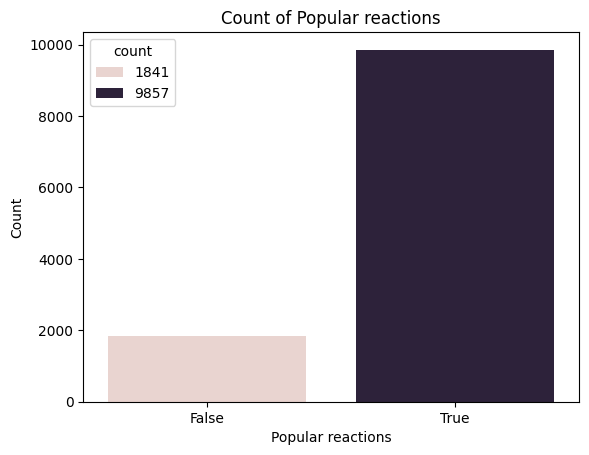

In [14]:
#Explore the distribution of ADR Term
reactions =['Toxic epidermal necrolysis','Stevens-Johnson syndrome','Type IV hypersensitivity reaction','Rash macular','Liver injury']
count1 = df['ADR Term'].str.contains('|'.join(reactions), case=False).value_counts()

#Ploting
sns.barplot(x=count1.index, y=count1.values, hue=count1)

plt.xlabel('Popular reactions')
plt.ylabel('Count')
plt.title('Count of Popular reactions')
plt.show()

The resulting bar plot shows the count of occurrences for each of the specified adverse drug reactions. The x-axis represents the presence or absence of the specified reactions (True or False), and the y-axis represents the count of occurrences. Each bar represents one of the specified reactions.

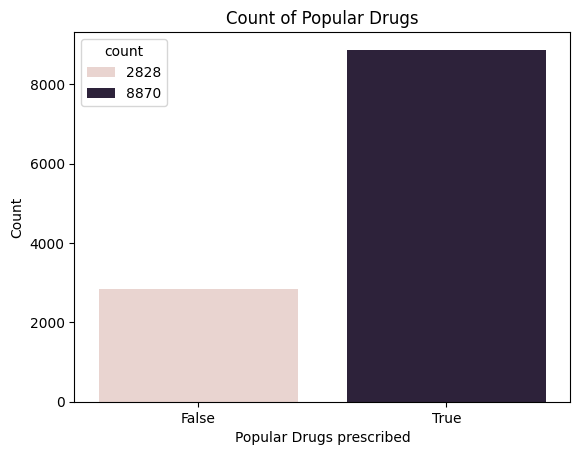

In [15]:
#Explore the distribution of Drug_Name

drug_names =['Carbamazepine', "Phenytoin", "Allopurinol", "Lamotrigine","co-trimoxazole"]
count1 = df['Drug_Name'].str.contains('|'.join(drug_names), case=False).value_counts()

#Ploting
sns.barplot(x=count1.index, y=count1.values, hue=count1)

plt.xlabel('Popular Drugs prescribed')
plt.ylabel('Count')
plt.title('Count of Popular Drugs')
plt.show()

The above graph shows the distribution of the drugs that have been prescribscriped in the dataset of ADR concerningscriped in the dataset of ADR with respect to genetic variations

Graph of count of ADR vs the different types of ADR in the dataset:

<ipython-input-16-c91269016d00>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ADR Term', data=df_filtered, palette=custom_palette, order=adr_counts_filtered.index)
<ipython-input-16-c91269016d00>:15: UserWarning: 
The palette list has fewer values (10) than needed (23) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='ADR Term', data=df_filtered, palette=custom_palette, order=adr_counts_filtered.index)


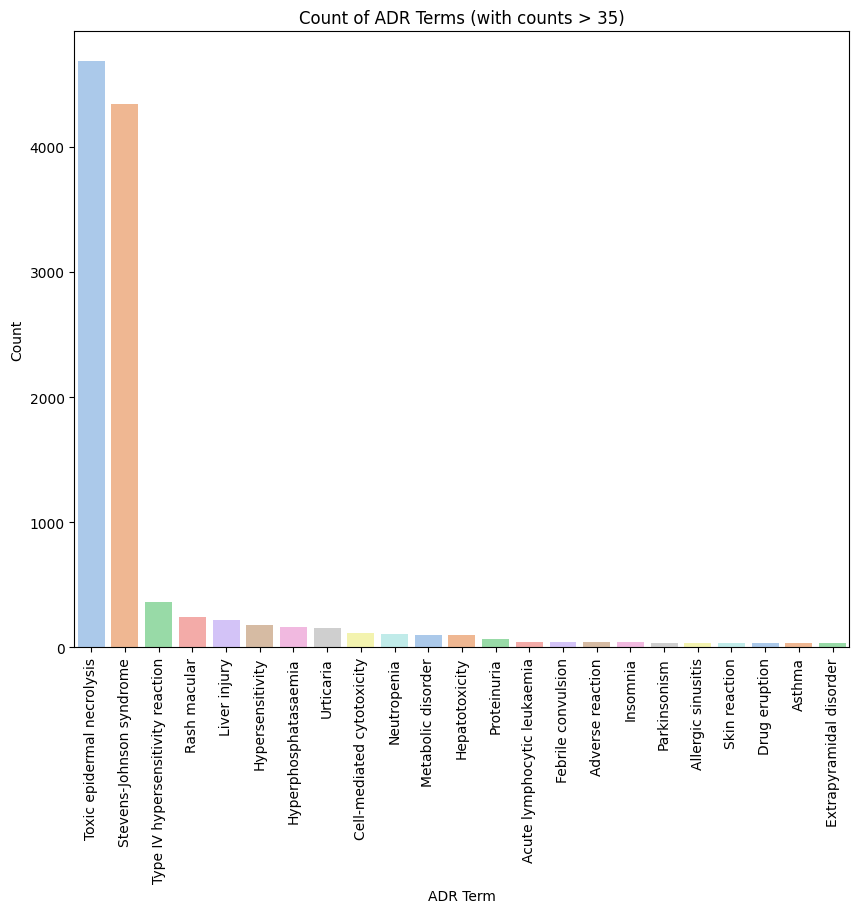

In [16]:
# Calculate the count of ADR terms
adr_counts = df['ADR Term'].value_counts()

# Filter ADR terms with counts greater than 35
adr_counts_filtered = adr_counts[adr_counts > 35]

# Subset the dataframe based on filtered ADR terms
df_filtered = df[df['ADR Term'].isin(adr_counts_filtered.index)]

# Define a custom color palette
custom_palette = sns.color_palette("pastel")

# Plot the count of ADR terms
plt.figure(figsize=(10, 8))
sns.countplot(x='ADR Term', data=df_filtered, palette=custom_palette, order=adr_counts_filtered.index)
plt.title('Count of ADR Terms (with counts > 35)')
plt.xlabel('ADR Term')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

The plot provides a clear visualization of the most frequent adverse drug reaction terms observed in the dataset, helping to identify the most common reactions.

Drugs which have been observed to cause the same ADR :  

<ipython-input-17-4d5c0b9cf219>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Drug_Name', data=df_subset, palette='Set3')


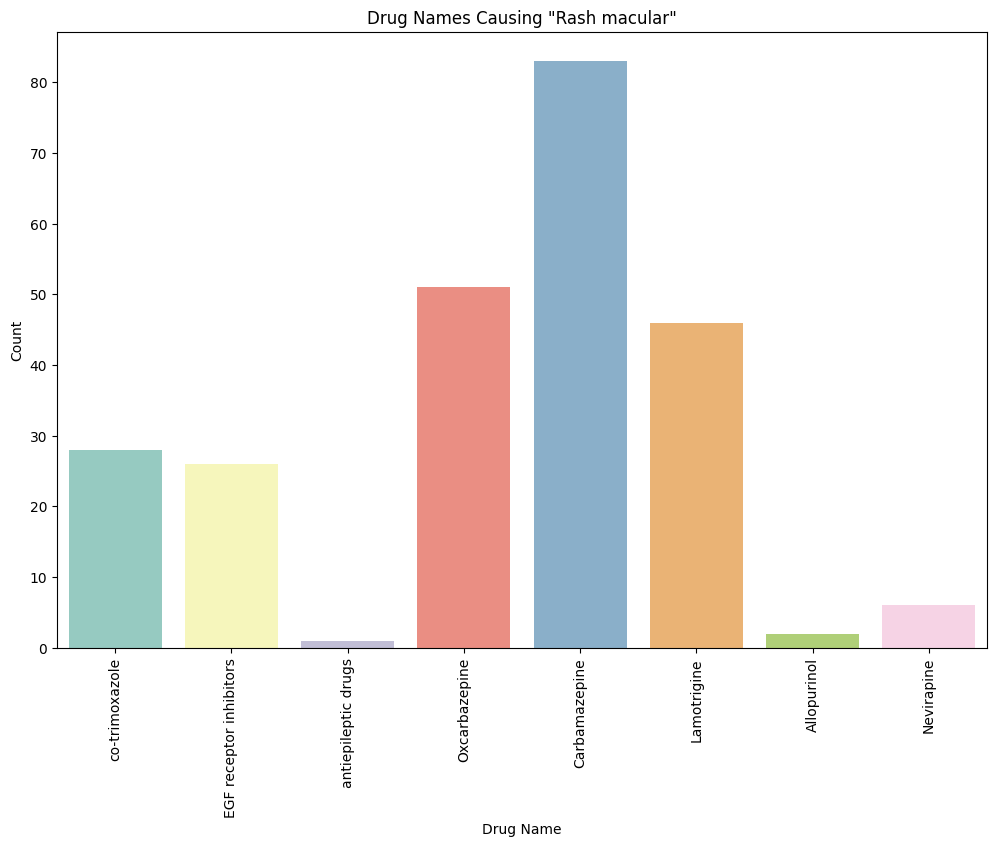

<ipython-input-17-4d5c0b9cf219>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Drug_Name', data=df_subset, palette='Set3')


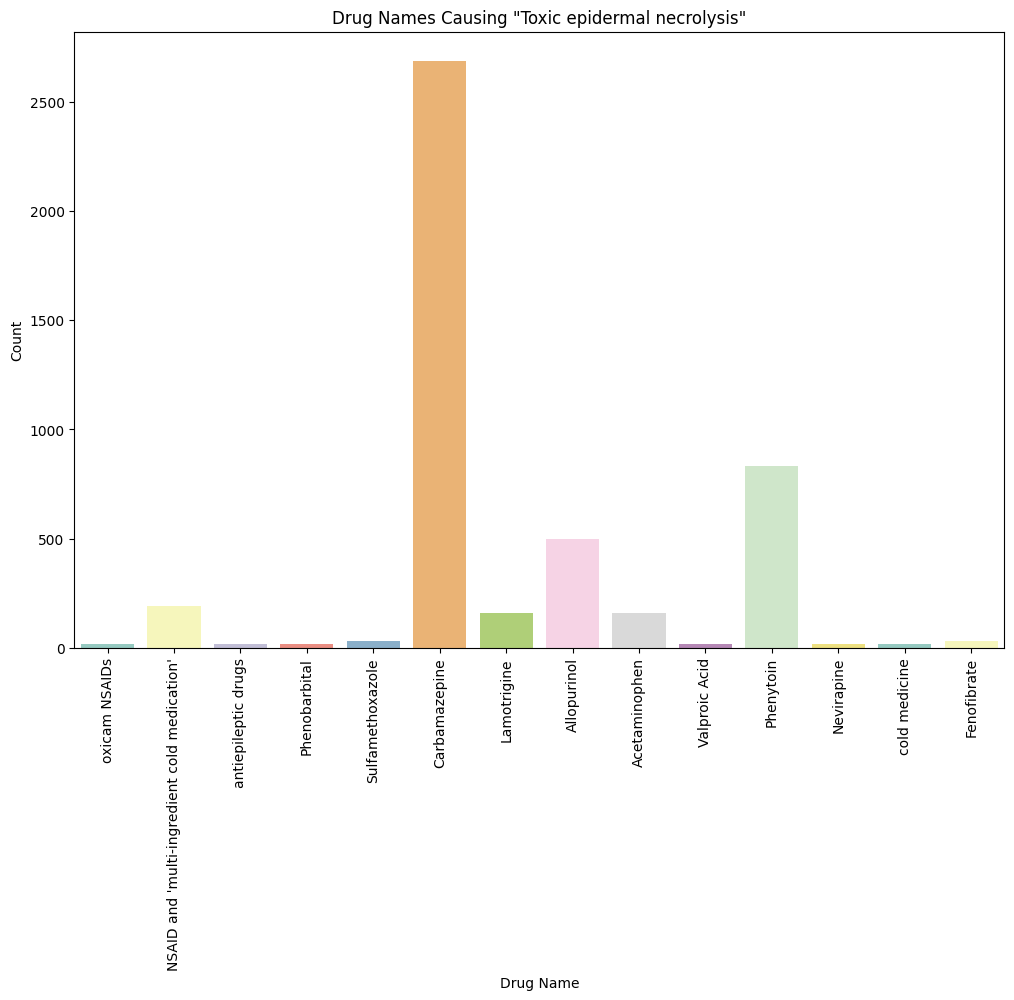

<ipython-input-17-4d5c0b9cf219>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Drug_Name', data=df_subset, palette='Set3')


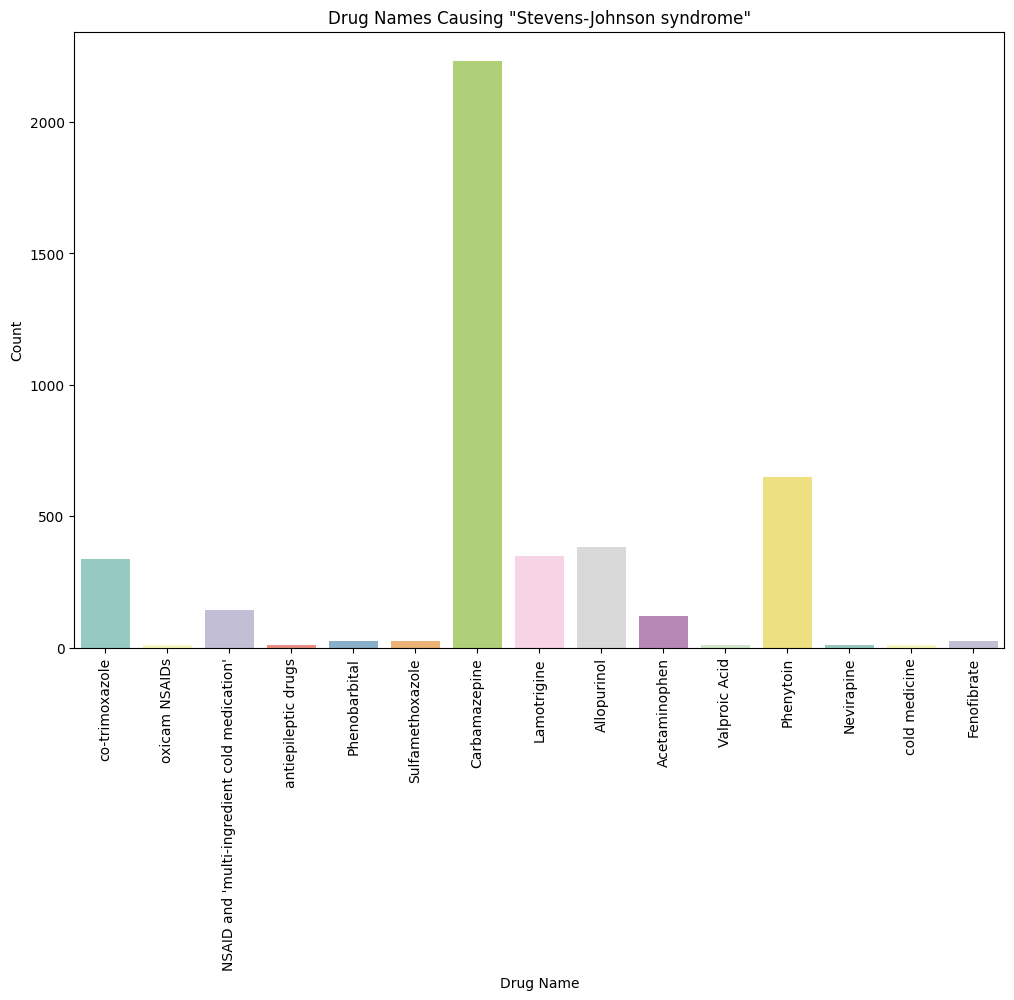

<ipython-input-17-4d5c0b9cf219>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Drug_Name', data=df_subset, palette='Set3')


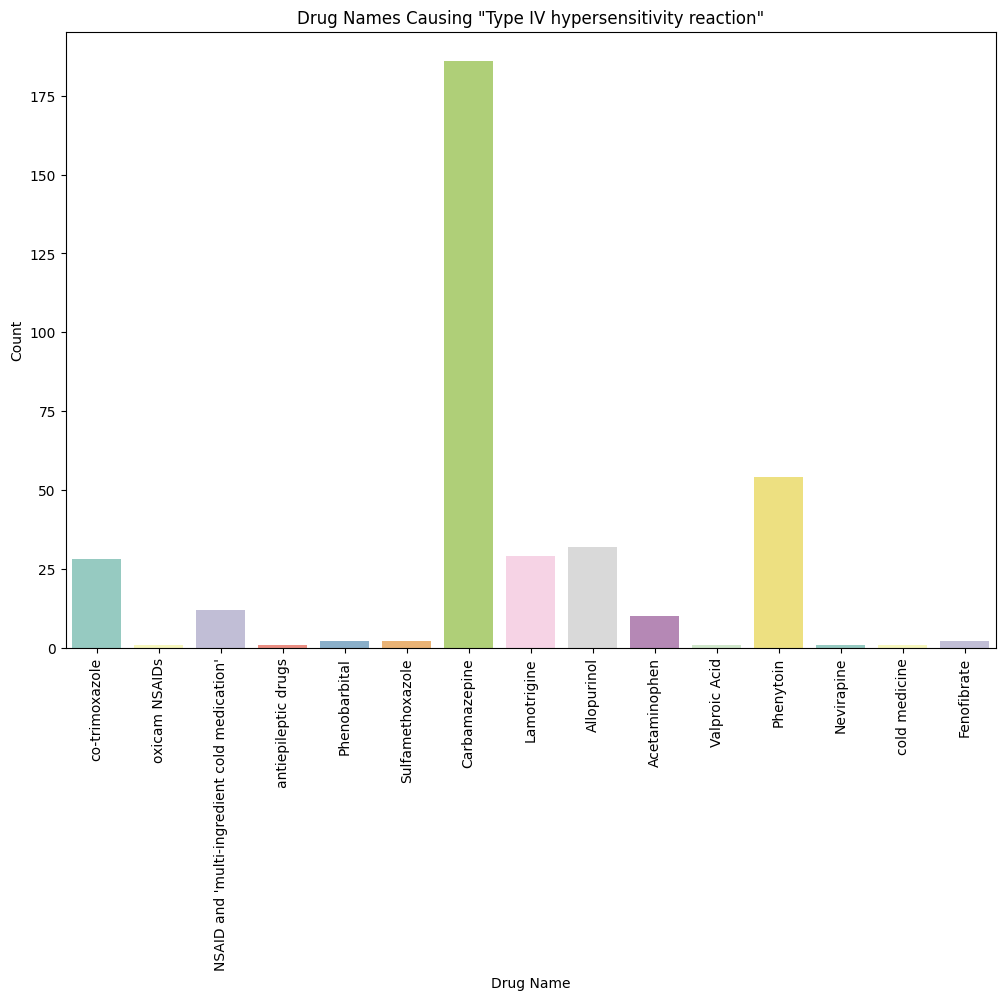

<ipython-input-17-4d5c0b9cf219>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Drug_Name', data=df_subset, palette='Set3')


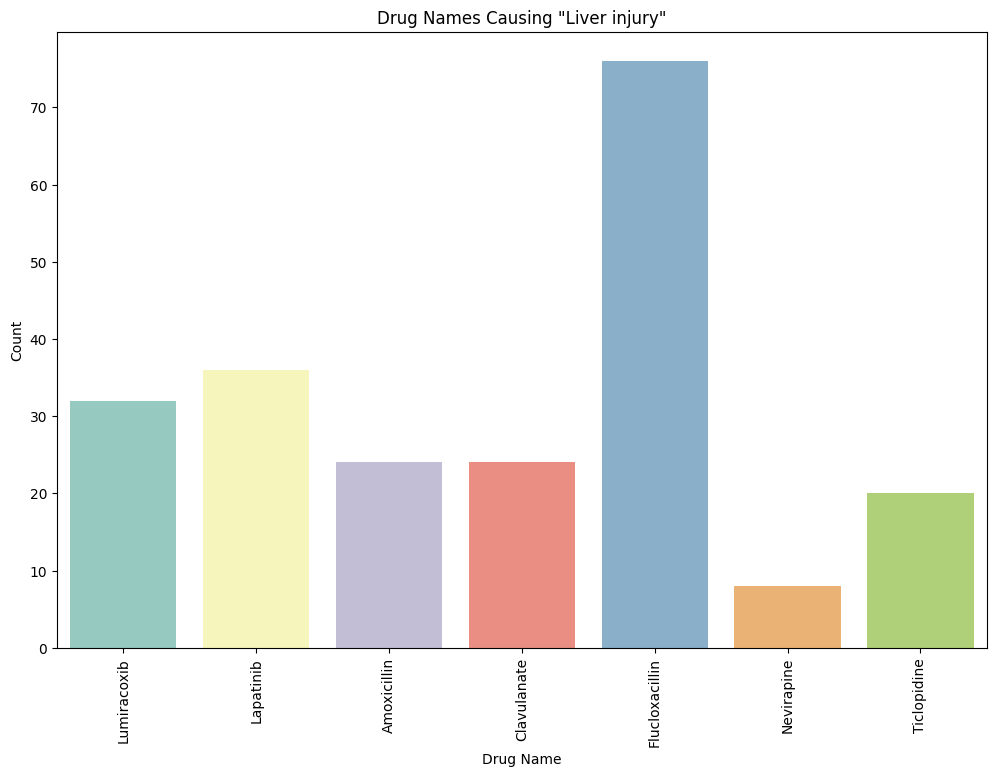

<ipython-input-17-4d5c0b9cf219>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Drug_Name', data=df_subset, palette='Set3')


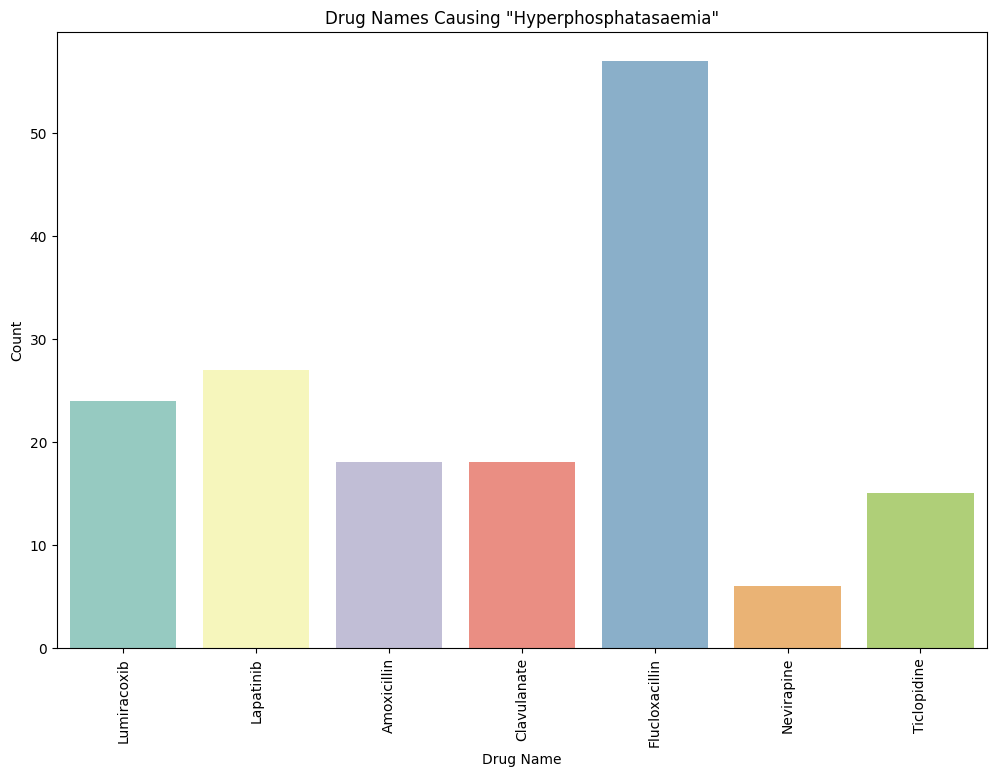

<ipython-input-17-4d5c0b9cf219>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Drug_Name', data=df_subset, palette='Set3')


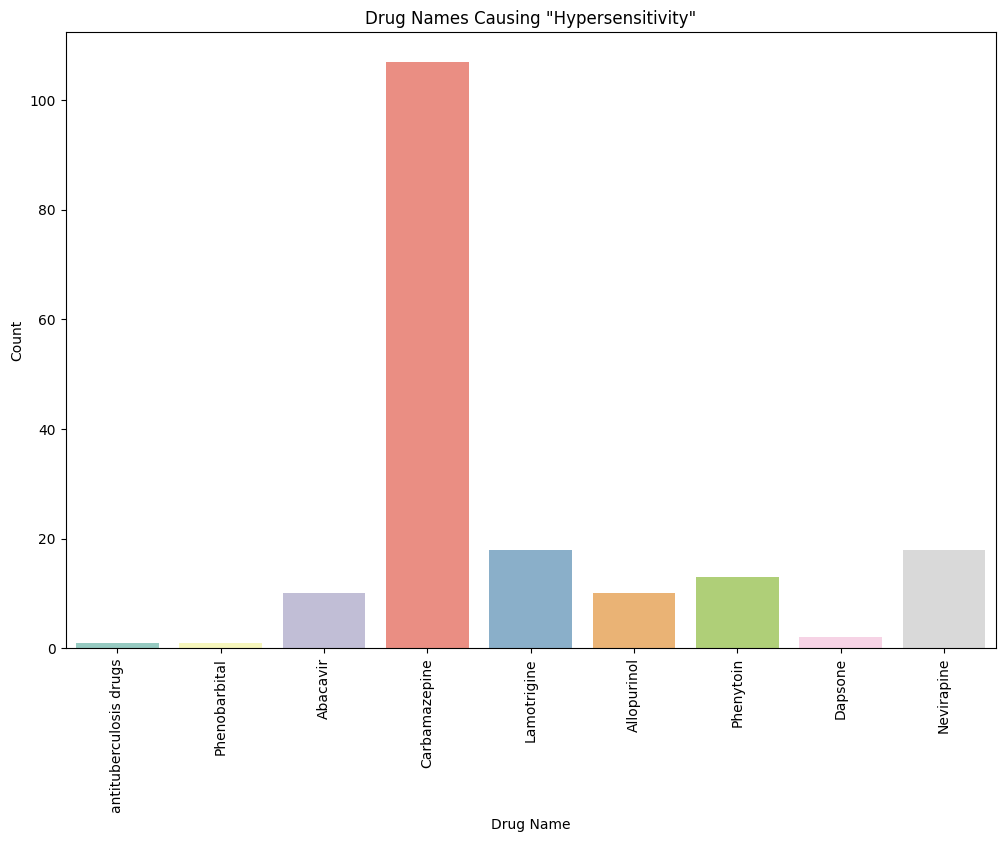

<ipython-input-17-4d5c0b9cf219>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Drug_Name', data=df_subset, palette='Set3')


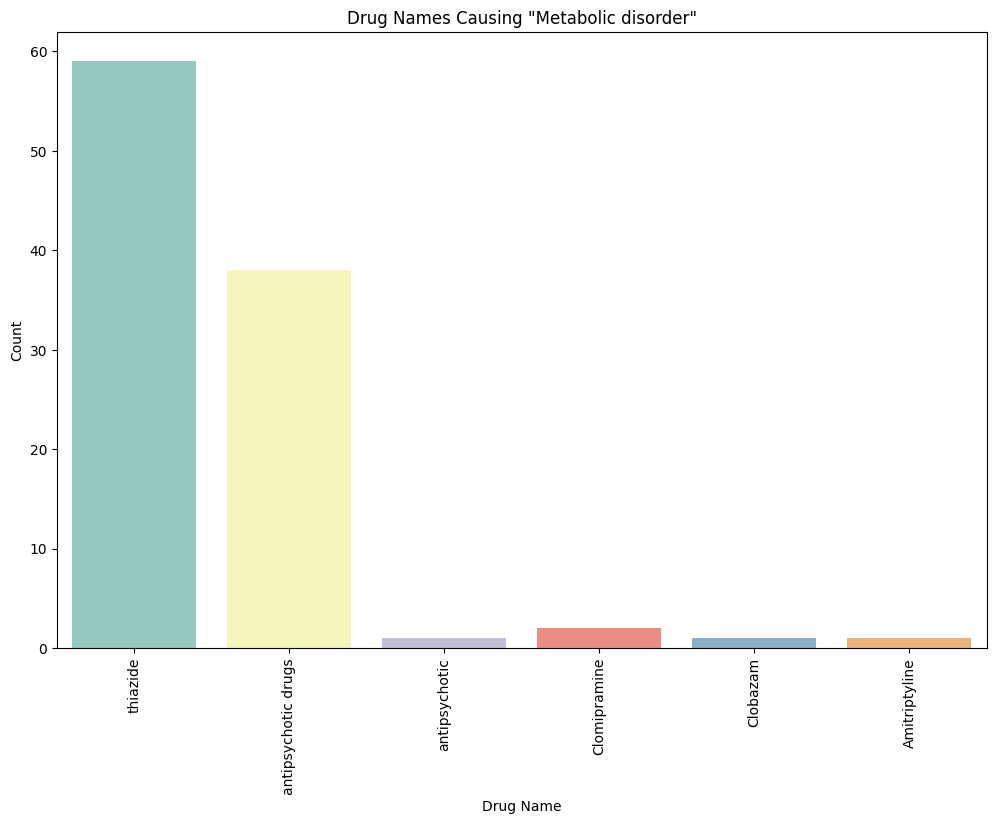

<ipython-input-17-4d5c0b9cf219>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Drug_Name', data=df_subset, palette='Set3')


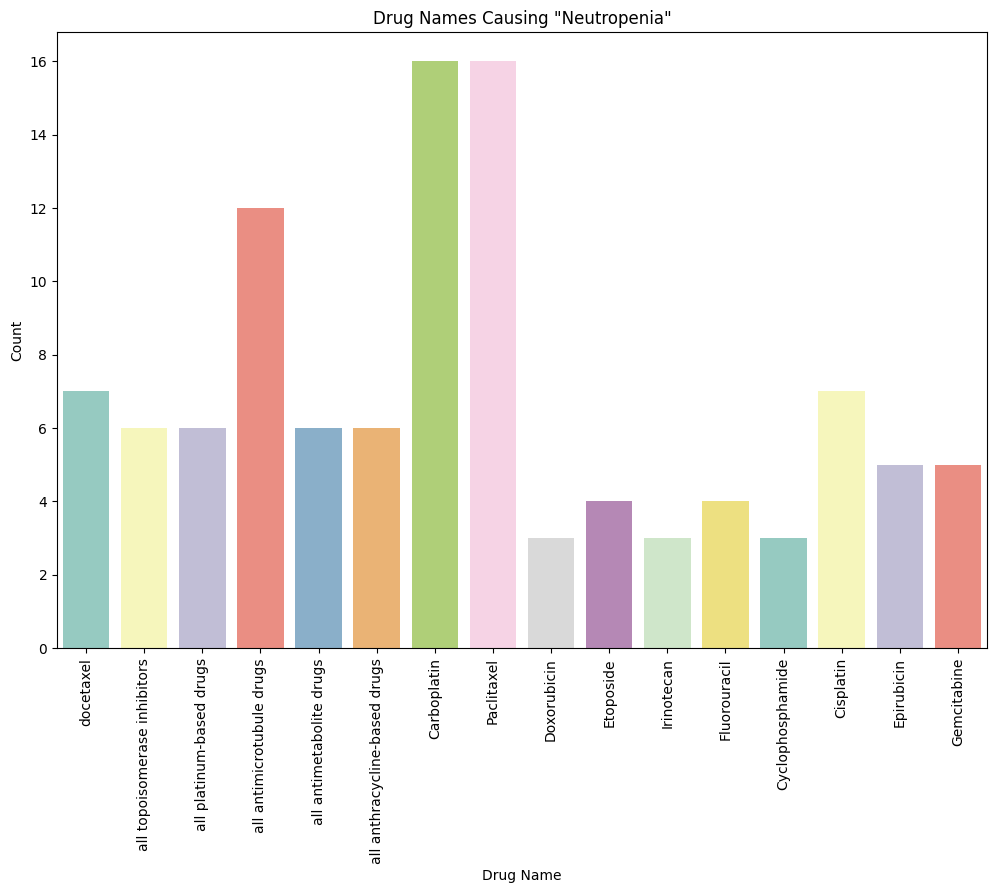

<ipython-input-17-4d5c0b9cf219>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Drug_Name', data=df_subset, palette='Set3')


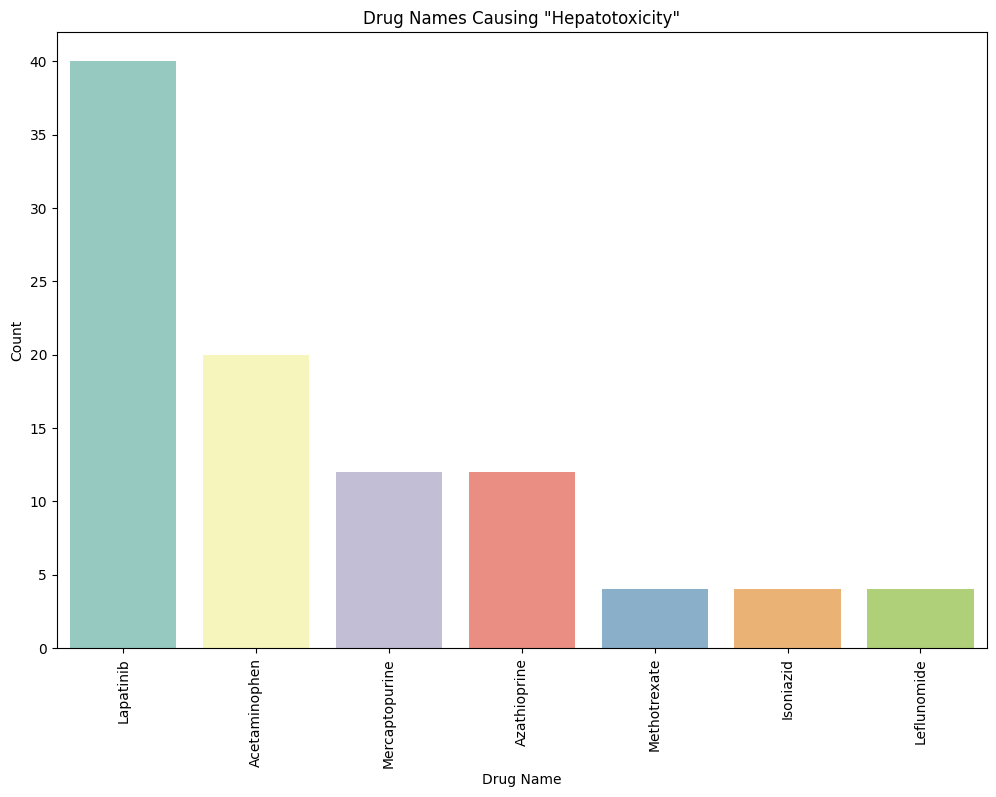

In [17]:
# Get unique ADR terms
unique_adr_terms = df['ADR Term'].unique()

# Plot count plots for each ADR term
for adr_term in unique_adr_terms:
    # Filter the dataframe for the current ADR term
    df_subset = df[df['ADR Term'] == adr_term]

    # Check if the number of drugs associated with the current ADR term is greater than 5
    if len(df_subset['Drug_Name'].unique()) > 5:
        # Plot the count of drug names for the current ADR term
        plt.figure(figsize=(12, 8))
        sns.countplot(x='Drug_Name', data=df_subset, palette='Set3')
        plt.title(f'Drug Names Causing "{adr_term}"')
        plt.xlabel('Drug Name')
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plt.show()


To find genes that are more susceptitable to ADR :

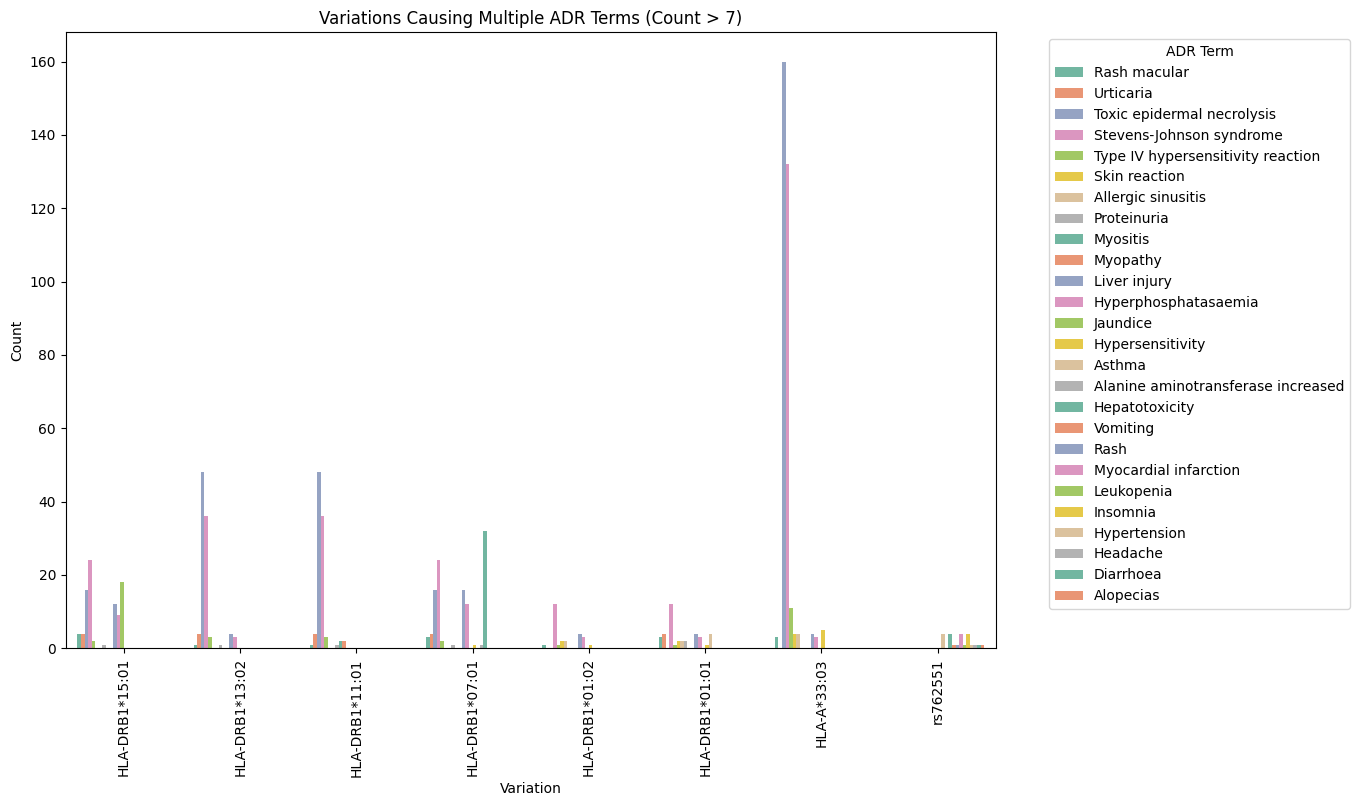

In [18]:
# Group by Variation and count unique ADR terms
variation_adr_counts = df.groupby('Variation')['ADR Term'].nunique()

# Filter variations causing more than seven ADR terms
multiple_adr_variations = variation_adr_counts[variation_adr_counts > 7].index

# Filter the dataframe for variations causing more than seven ADR terms
df_filtered = df[df['Variation'].isin(multiple_adr_variations)]

# Plot the count of ADR terms for each variation
plt.figure(figsize=(12, 8))
sns.countplot(x='Variation', hue='ADR Term', data=df_filtered, palette='Set2')
plt.title('Variations Causing Multiple ADR Terms (Count > 7)')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='ADR Term', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

To find link in the dataset between Liver Injury and Hyperphosphatasaemia:

In [19]:
# Filter the dataframe for rows containing "Liver injury" or "Hyperphosphatasaemia"
filtered_df = df[df['ADR Term'].isin(["Liver injury", "Hyperphosphatasaemia"])]

# Pivot the dataframe to have variations as columns and ADR terms as values
pivot_df = filtered_df.pivot_table(index='Variation', columns='ADR Term', aggfunc='size', fill_value=0)

# Calculate the correlation coefficient between "Liver injury" and "Hyperphosphatasaemia" for each variation
correlation = pivot_df.corr().loc['Liver injury', 'Hyperphosphatasaemia']

print("Correlation coefficient between 'Liver injury' and 'Hyperphosphatasaemia':", correlation)

Correlation coefficient between 'Liver injury' and 'Hyperphosphatasaemia': 1.0000000000000002


In [20]:
# Filter to find people who have been observed  to have "Liver injury" or "Hyperphosphatasaemia"
filtered_df = df[df['ADR Term'].isin(["Liver injury", "Hyperphosphatasaemia"])]

# Group by Variation in genes and count occurrences of each variation
variation_counts = filtered_df.groupby('Variation').size()

# Filter variations with counts greater than 7 for both "Liver injury" and "Hyperphosphatasaemia"
variations_greater_than_7 = variation_counts[variation_counts > 7]

# Get the list of variations
variations_list = variations_greater_than_7.index.tolist()

In [21]:
variations_list

['HLA-A*30:02',
 'HLA-B*18:01',
 'HLA-DQA1*02:01',
 'HLA-DQB1*02:02',
 'HLA-DQB1*06:02',
 'HLA-DRB1*07:01',
 'HLA-DRB1*15:01',
 'rs2523822',
 'rs3129900',
 'rs9274407']

This implies that there were more than 7 individuals with that variation who experienced both "Liver injury" and "Hyperphosphatasaemia".

In [22]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['BADD_TID', 'ADR_ID', 'ADReCS ID', 'ADR Term', 'Drug_Name', 'Variation']

label_encoders = {}

# Encode each column
for col in columns_to_encode:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Print encoded data
df.head()

,BADD_TID,ADR_ID,ADReCS ID,ADR Term,Variation,Drug_Name
0,4262,51,123,77,212,86
1,4261,51,123,77,211,86
2,4260,51,123,77,208,28
3,4259,51,123,77,208,86
4,4258,51,123,77,207,86


In [23]:
# Separate features (X) and target (y)
X = df.drop('Variation', axis=1)
y = df['Variation']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [24]:
X_train

,BADD_TID,ADR_ID,ADReCS ID,ADR Term,Drug_Name
5157,2746,57,54,83,86
10057,1034,73,75,53,100
5400,2671,57,54,83,52
9036,1553,57,49,83,59
994,3802,63,45,89,11
...,...,...,...,...,...
11289,212,63,63,89,11
5191,2735,57,62,83,86
5390,2674,57,62,83,52
860,3835,63,63,89,11


In [25]:
y_train

5157     173
10057    328
5400       5
9036     108
994       91
        ... 
11289    656
5191     169
5390       5
860       98
7270      18
Name: Variation, Length: 8188, dtype: int64

Random Forest Classifier:

In [26]:
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7826210826210827


In [27]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Instantiate the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter distribution for hyperparameter tuning
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform Randomized Search Cross-Validation for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}


In [29]:
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)

# Train the classifier on the training data
best_rf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = best_rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7849002849002849


In [30]:
'''def identify_potential_risks_for_gene_variation(genetic_variation):
    # Predict gene variation
    predicted_variation = rf_classifier.predict(genetic_variation)

    # Filter the data for instances where the predicted gene variation matches
    matching_indices = (y_train == predicted_variation)

    # Extract potential ADR terms and drug names for matching indices
    potential_adr_terms = X_train.loc[matching_indices, 'ADR Term'].tolist()
    potential_drug_names = X_train.loc[matching_indices, 'Drug_Name'].tolist()

    return potential_adr_terms, potential_drug_names

# Example usage:
new_genetic_variation = [[173, 108, 98, 18, 169]]  # Example new genetic variation data
potential_adr_terms, potential_drug_names = identify_potential_risks_for_gene_variation(new_genetic_variation)

print("Potential Adverse Drug Reaction Terms:")
print(potential_adr_terms)
print("Potential Harmful Drug Names:")
print(potential_drug_names)'''

'def identify_potential_risks_for_gene_variation(genetic_variation):\n    # Predict gene variation\n    predicted_variation = rf_classifier.predict(genetic_variation)\n\n    # Filter the data for instances where the predicted gene variation matches\n    matching_indices = (y_train == predicted_variation)\n\n    # Extract potential ADR terms and drug names for matching indices\n    potential_adr_terms = X_train.loc[matching_indices, \'ADR Term\'].tolist()\n    potential_drug_names = X_train.loc[matching_indices, \'Drug_Name\'].tolist()\n\n    return potential_adr_terms, potential_drug_names\n\n# Example usage:\nnew_genetic_variation = [[173, 108, 98, 18, 169]]  # Example new genetic variation data\npotential_adr_terms, potential_drug_names = identify_potential_risks_for_gene_variation(new_genetic_variation)\n\nprint("Potential Adverse Drug Reaction Terms:")\nprint(potential_adr_terms)\nprint("Potential Harmful Drug Names:")\nprint(potential_drug_names)'

In [31]:
!pip install openai==0.28

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 2.2 MB/s eta 0:00:00


In [32]:
import openai

In [33]:
openai.api_key = 'sk-proj-76LEDzoJCdzBxxB5VqJnT3BlbkFJKU2Co1BwslCMExLma6Zp'

In [34]:
# Define your prompt with the code and context

'''prompt = """
For this model:

best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)

# Train the classifier on the training data
best_rf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = best_rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Connect the GPT-3.5 model and obtain predicted results using the following statements:
"""

gene_info = f"Drug: {drug_name}, ADR Term: {adr_term}, Variation: {variation}"
prompt_with_gene = prompt + gene_info

# Incorporate gene information into the prompt
prompt_with_gene = prompt + gene_info

# Generate text using GPT-3.5
response = openai.Completion.create(
  prompt=prompt,
  max_tokens=500,
  n=1,
  stop=None,
  temperature=0.5,
  engine="davinci-002"  # Use a different supported model here
)

# Print the generated text
print(response.choices[0].text.strip())'''

'prompt = """\nFor this model:\n\nbest_rf_classifier = RandomForestClassifier(random_state=42, **best_params)\n\n# Train the classifier on the training data\nbest_rf_classifier.fit(X_train, y_train)\n\n# Predict on the testing data\ny_pred = best_rf_classifier.predict(X_test)\n\n# Calculate accuracy\naccuracy = accuracy_score(y_test, y_pred)\nprint("Accuracy:", accuracy)\n\nConnect the GPT-3.5 model and obtain predicted results using the following statements:\n"""\n\ngene_info = f"Drug: {drug_name}, ADR Term: {adr_term}, Variation: {variation}"\nprompt_with_gene = prompt + gene_info\n\n# Incorporate gene information into the prompt\nprompt_with_gene = prompt + gene_info\n\n# Generate text using GPT-3.5\nresponse = openai.Completion.create(\n  prompt=prompt,\n  max_tokens=500,\n  n=1,\n  stop=None,\n  temperature=0.5,\n  engine="davinci-002"  # Use a different supported model here\n)\n\n# Print the generated text\nprint(response.choices[0].text.strip())'

In [44]:
import time

# Define your prompt with the code and context
prompt = """
For this model:

best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)

# Train the classifier on the training data
best_rf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = best_rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Connect the GPT-3.5 model and obtain predicted results using the following statements:
"""

# Assuming you have a DataFrame named 'df' containing the relevant columns
# Extracting unique drug names from the DataFrame
unique_drug_names = df['Drug_Name'].unique()

# Initialize a counter for variations
total_variations = 0

# Iterate over each unique drug name
for drug_name in unique_drug_names:
    # Filter the DataFrame for the current drug name
    drug_data = df[df['Drug_Name'] == drug_name]

    # Group variations and their corresponding unique ADR terms together
    variation_adr_mapping = {}
    for index, row in drug_data.iterrows():
        variation = row['Variation']
        adr_term = row['ADR Term']
        if variation not in variation_adr_mapping:
            variation_adr_mapping[variation] = set()  # Use a set to store unique ADR terms
        if adr_term:
            variation_adr_mapping[variation].add(str(adr_term))  # Convert to string and add to set

    # Construct gene information for the current drug
    gene_info = f"\nDrug: {drug_name}\n"
    count = 0
    for variation, adr_terms in variation_adr_mapping.items():
        if total_variations == 6:
            break  # Stop after reaching a total of 6 variations
        gene_info += f"Variation: {variation}, ADR Terms: {', '.join(adr_terms)}\n"
        total_variations += 1

    # Incorporate gene information into the prompt
    prompt_with_gene = prompt + gene_info

    # Generate text using GPT-3.5
    response = openai.Completion.create(
        prompt=prompt_with_gene,
        max_tokens=50,
        n=1,
        stop=None,
        temperature=0.5,
        engine="davinci-002"  # Use a different supported model here
    )

    # Print the generated text
    print(response.choices[0].text.strip())

    # If total_variations reaches 6, exit the loop
    if total_variations == 6:
        break

Variation: 199, ADR Terms: 83, 90, 77
Variation: 196, ADR Terms: 83, 90, 77
Variation: 195, ADR Terms: 83
